<a href="https://colab.research.google.com/github/mothukuriv/ML/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression 
You have attached dataset titled Salaries-Simple_Linear.csv contains two columns: Years_of_Expertise and Salary. 
 
Your task is to create a model with the best fitting line that enables to estimate new salaries (y’s) based on the years of experience (x’s) to new hire employees using simple linear regression techniques!

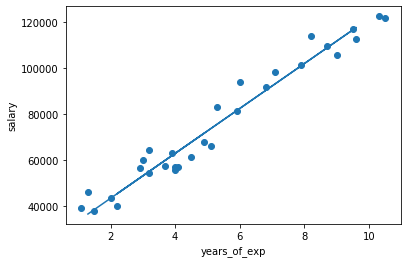

In [9]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot  as mplt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/Salaries-Simple_Linear.csv')

#dataset.head(5)


#mplt.scatter(dataset['Years_of_Expertise'],dataset['Salary'])
X=dataset['Years_of_Expertise']
Y=dataset['Salary']
#mplt.scatter(X,Y)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20)
simple_LR_model = linear_model.LinearRegression()
x1=X_train.to_numpy()

xt=x1.reshape(-1,1)
simple_LR_model.fit(xt,y_train)

xtest = (X_test.to_numpy()).reshape(-1,1)

y_predict1 = simple_LR_model.predict(xtest)
mplt.ylabel('salary')
mplt.xlabel('years_of_exp')
mplt.scatter(X,Y)
mplt.plot(xtest,y_predict1)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


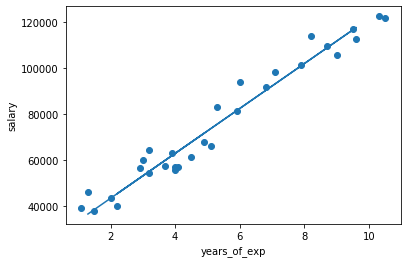

In [10]:

# Optimize

simple_LR_model_optimize = linear_model.SGDClassifier(learning_rate='optimal', max_iter=3)
simple_LR_model_optimize.fit(xt,y_train)

y_predict2 = simple_LR_model.predict(xtest)
mplt.ylabel('salary')
mplt.xlabel('years_of_exp')
mplt.scatter(X,Y)
mplt.plot(xtest,y_predict2)


Multiple Linear Regression 
You have attached dataset titled 3-Products-Multiple.csv contains four columns: Product_1, Product_2, Product_3, Location, and Profit.
 
Your task is to build a model using Multiple Linear Regression technique that tells what factors (x’s) that affect profitability of a business. For example, investing more in the Product_1, Product_2, or Product_3 at a certain city (x’s) to maximize the profit (y’s)?
So, you have four features (Product_1, Product_2, Product_3, Location) will help you to build your model to predict the better profit could be obtained by investing more on a specific product at a particular city!  You have two options here to create your model that are:
2 input features (Product_3 and Location); 1 output represents the estimate profit based on these two features.
2 input features (Product_1 and Product_3); 1 output represents the estimate profit based on these two features.

In [11]:
import tensorflow as tf;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot  as mplt;
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


def convert_location(s):
    if s == 'City_1':
        return 1
    if s == 'City_2':
        return 2
    if s == 'City_3':
        return 3
    return -1

dataset = pd.read_csv('/content/3-Products-Multiple.csv', converters={'Location':convert_location})

Product_1_mean = dataset['Product_1'].mean()
Product_3_mean = dataset['Product_3'].mean()

dataset['Product_1'] = dataset.replace(dataset[dataset.Product_1 == 0], Product_1_mean)
dataset['Product_3'] = dataset.replace(dataset[dataset.Product_1 == 0], Product_3_mean)





# input features (Product_3 and Location); 1 output represents the estimate profit based on these two features.
# input features (Product_1 and Product_3); 1 output represents the estimate profit based on these two features.

X1 = dataset[['Product_3', 'Location']]
Y = dataset['Profit']
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, Y, test_size=0.20)

X2 = dataset[['Product_1', 'Product_3']]
Y = dataset['Profit']
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, Y, test_size=0.20)

multiLR_model1 = linear_model.LinearRegression()

multiLR_model2 = linear_model.LinearRegression()

multiLR_model1.fit(X_train1, y_train1)



y_predict1 = multiLR_model1.predict(X_test1)

score_1 = r2_score(y_test1, y_predict1)

multiLR_model2.fit(dataset[['Product_1', 'Product_3']], dataset['Profit'])


y_predict2 = multiLR_model2.predict(X_test2)

score_2 = r2_score( y_test2, y_predict2)

print("Score Multivariant Linear Regression model on Product_3 and Location is", score_1)

print("Score Multivariant Linear Regression model on Product_1 and Product_3 is", score_2)




Score Multivariant Linear Regression model on Product_3 and Location is 0.8881006377232951
Score Multivariant Linear Regression model on Product_1 and Product_3 is 0.17411567541998685


Polynomial Regression 
You have attached dataset titled Propose-Salaries-Polynomial.csv contains three columns: Position, Level, and Salary. 
 
Your task is to build a model with the best representation to our datasets that enables to estimate new salaries (y’s) based on the levels to new hire employees using the polynomial regression technique! Please assume that the level represents the position code (x’s), so you don’t need to use the position field during building your model! I want to find the estimate salary to a new hire employee at level 6.5! 

In [18]:
import tensorflow as tf;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot  as mplt;
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures



dataset = pd.read_csv('/content/Propose-Salaries-Polynomial.csv')

X = dataset.iloc[:, 1:2].values

y = dataset.iloc[:, 2].values

Polynomial_model_1 = linear_model.LinearRegression()

Polynomial_model_1.fit(X, y)

Poly_f = PolynomialFeatures(degree=4)

X_p = Poly_f.fit_transform(X)

Polynomial_model_2 = linear_model.LinearRegression()

Polynomial_model_2.fit(X_p, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

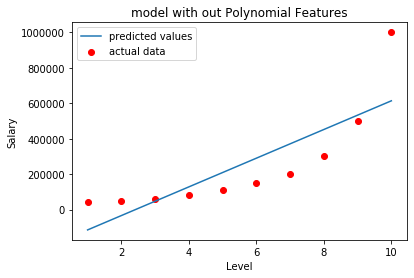

In [14]:
mplt.title('model with out Polynomial Features')
mplt.xlabel('Level')
mplt.ylabel('Salary')
mplt.scatter(X,y , color='red', label ='actual data')
mplt.plot(X, Polynomial_model_1.predict(X), label='predicted values')
mplt.legend()


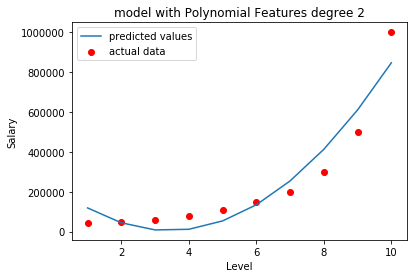

In [15]:
mplt.title('model with Polynomial Features degree 2')
mplt.xlabel('Level')
mplt.ylabel('Salary')
mplt.scatter(X,y , color='red',  label ='actual data')
mplt.plot(X, Polynomial_model_2.predict(X_p), label='predicted values', )
mplt.legend()

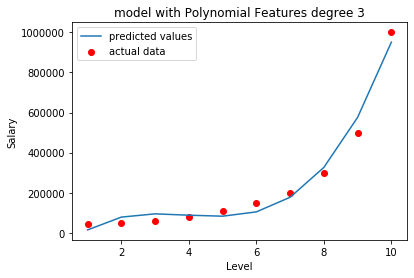

In [17]:
mplt.title('model with Polynomial Features degree 3')
mplt.xlabel('Level')
mplt.ylabel('Salary')
mplt.scatter(X,y , color='red',  label ='actual data')
mplt.plot(X, Polynomial_model_2.predict(X_p), label='predicted values', )
mplt.legend()

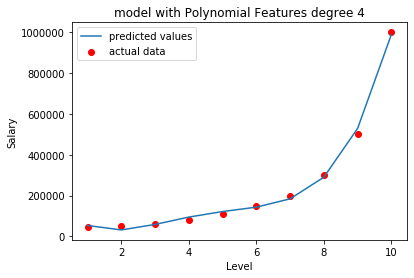

In [19]:
mplt.title('model with Polynomial Features degree 4')
mplt.xlabel('Level')
mplt.ylabel('Salary')
mplt.scatter(X,y , color='red',  label ='actual data')
mplt.plot(X, Polynomial_model_2.predict(X_p), label='predicted values', )
mplt.legend()